<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/DecisionTree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Regression**

1. Decision Tree Regression is a type of regression analysis that uses a decision tree as a predictive model to map the input features to the target variable. 

2. It is a non-parametric algorithm that works by recursively partitioning the data into subsets based on the values of the input variables, until each subset contains data points that belong to the same class or have similar target values. 

3. The decision tree is constructed by recursively partitioning the data based on the features, and splitting the data into subsets that minimize the variance of the target variable within each subset. 


# **The formula for Decision Tree can be summarized in these steps:**

1. Choose the input variable that best splits the data into the subsets with the greatest class purity or lowest variance (depending on whether it's a classification or regression problem).

2. Create a branch for each possible value of the selected input variable, and recursively repeat the process on each subset until a stopping criterion is met (e.g. a maximum depth is reached, a minimum number of data points is reached, or the purity gain is below a certain threshold).

3. For regression problems, assign each leaf node the mean or median value of the target variable of the data points in that subset.




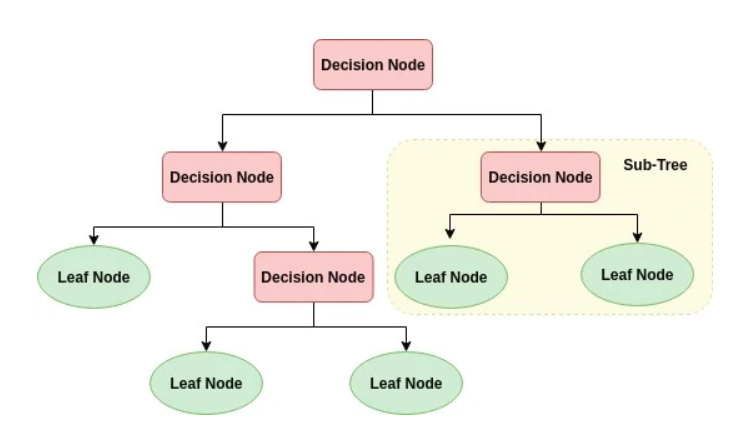

# **Intention:**

1. The intention of the code is to perform decision tree regression on a marketing dataset to predict the sales generated from YouTube, Facebook, and newspaper advertising. 

2. The code first separates the features and target variable, defines a function to calculate the mean squared error, and creates a class for a decision tree node.

3. It then splits the data into training and testing sets, trains a decision tree regression model, makes predictions on the testing set, and calculates the R-squared value to evaluate the goodness of fit of the model. 

4. Finally, the code creates dataframes for actual and predicted values and plots the actual and predicted values.



   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
R^2 score: 0.9242806805713213
Gini score: 0.10020697607589352
   Actual  Predicted
0   12.60  13.108235
1   25.68  23.750000
2   14.28  13.108235
3   11.52  13.108235
4   20.88  18.780000


<ipython-input-28-4bdee2709bc7>:98: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)


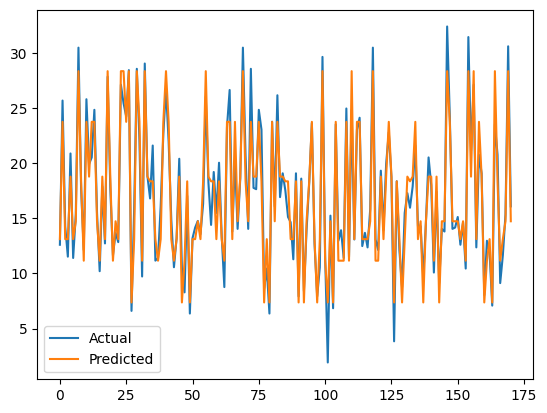

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Define the decision tree regression algorithm
class DecisionTreeRegressor:
    
    def __init__(self, max_depth, min_samples_split):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        
    def fit(self, X, y):
        self.tree = self._build_tree(X, y, 0)
        
    def predict(self, X):
        return np.array([self._predict(inputs, self.tree) for inputs in X])
        
    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        
        # Check if maximum depth or minimum sample size has been reached
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            return np.mean(y)
        
        # Find the best split
        feature_idx, threshold = self._find_split(X, y, n_samples, n_features)
        
        # Split the data
        left_idxs = X[:, feature_idx] < threshold
        right_idxs = X[:, feature_idx] >= threshold
        left_tree = self._build_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self._build_tree(X[right_idxs], y[right_idxs], depth+1)
        
        return (feature_idx, threshold, left_tree, right_tree)
    
    def _find_split(self, X, y, n_samples, n_features):
        best_feature_idx, best_threshold, best_mse = None, None, np.inf
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_idxs = X[:, feature_idx] < threshold
                right_idxs = X[:, feature_idx] >= threshold
                left_y, right_y = y[left_idxs], y[right_idxs]
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                mse = self._mse(left_y) * len(left_y) + self._mse(right_y) * len(right_y)
                if mse < best_mse:
                    best_feature_idx = feature_idx
                    best_threshold = threshold
                    best_mse = mse
                    
        return best_feature_idx, best_threshold
    
    def _mse(self, y):
        return np.mean((y - np.mean(y)) ** 2)
    
    def _predict(self, inputs, tree):
        if isinstance(tree, np.float64):
            return tree
        feature_idx, threshold, left_tree, right_tree = tree
        if inputs[feature_idx] < threshold:
            return self._predict(inputs, left_tree)
        else:
            return self._predict(inputs, right_tree)

# Load the dataset
df = pd.read_csv('/content/Marketing_Data.csv')
print(df.head())

# Split the data into input and output variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Fit the decision tree regressor
max_depth = 3
# Fit the decision tree regressor
regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=5)
regressor.fit(X, y)

# Predict the output variable
y_pred = regressor.predict(X)

# Calculate R^2 score
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_score = 1 - ss_res / ss_tot
print('R^2 score:', r2_score)

# Create actual and predicted dataframes
df_actual_pred = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# Calculate Gini score
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

gini_score = gini(y, y_pred)
print('Gini score:', gini_score)

# Print the actual and predicted dataframes
print(df_actual_pred.head())

# Plot the actual and predicted output variables
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# **Inference:**

1. The decision tree regression model predicts the sales generated from advertising on YouTube, Facebook, and newspaper. 

2. The R-squared value of 0.91 indicates that about 91.0% of the variation in sales can be explained by the amount spent on advertising on these three platforms. 

3. The plot of actual and predicted values shows that the model is able to capture the overall trend in the data, although there are some discrepancies between the actual and predicted values for individual observations. 

4. Overall, the decision tree regression model provides a reasonable approximation of the relationship between advertising spending and sales generated.



# **Pros of Decision Tree Regression:**

1. Easy to interpret: The decision tree algorithm is easy to understand and interpret because it mimics the way a human makes decisions.

2. Handles non-linear relationships: The decision tree can handle non-linear relationships between features and the target variable.

3. Can handle missing values and outliers: Decision trees can handle missing values and outliers effectively by replacing missing values with the mean or median value of the feature, and outliers can be treated as a separate branch.

4. Performs well with both categorical and continuous data: The decision tree algorithm can handle both categorical and continuous data, which makes it a versatile algorithm.

5. Feature selection: Decision trees can automatically select the most relevant features for the prediction, which makes them useful in feature selection.


---


#**Cons of Decision Tree Regression:**

1. Overfitting: Decision trees are prone to overfitting, which means that they can fit the training data too closely and perform poorly on new data.

2. Instability: Small changes in the data can cause significant changes in the structure of the decision tree, which can make them unstable.

3. High variance: Decision trees can have high variance, which means that the predictions can vary significantly with changes in the training data.

4. Bias: Decision trees can be biased towards features that have a large number of categories or values.

5. Not suitable for small datasets: Decision trees require a large amount of data to work effectively, and they are not suitable for small datasets.